# Koreliacija COVID-19 pandemijos metu
> BTC ir ETH koreliacija su rinkomis pandemijos metu.

- toc: true 
- badges: true
- comments: false
- categories: [Dominykas Tautkus]
- image: images/BTC_price.png

In [1]:
#hide
%load_ext autoreload
%autoreload 2
import warnings
warnings.filterwarnings('ignore')
import plotly.graph_objects as go
import pandas as pd
import plotly.express as px
from scripts.read_data import read_api
from scripts.read_data import read_news
from scripts.read_data import read_covid
import matplotlib.pyplot as plt 
import numpy as np
import pandas as pd
import seaborn as sns 
from IPython.display import Markdown as md
sns.set()

In [31]:
#hide
df_all = read_api()
#df_all.index.name = 'date'

df_all.index = pd.to_datetime(df_all.index)
df_covid = df_all.loc[df_all.index > '2019-12-31 08:00:00']
df_covid = df_covid[['ETH', 'BTC', 'XAU', 'SP500']]
#df_covid = df_covid[['ETH', 'BTC', 'XAU']] ;

In [32]:
#hide
market = read_news('market')
covid = read_covid() ;

### Šios dienos kriptovaliutų ir pandemijos naujienos

In [33]:
#hide_input
#md('##### {}'.format(titleBTC)) 
md("- {}{} {}{} [| Skaityti daugiau]({}) ".format(market['title'],'. ', market['body'], ' ...', market['url']))

- 'Traditional' Art vs. Crypto Art: How to Value It.  EthBoy, by Trevor, Alotta Money. Sold for ETH 260. Updates once a day to reflect ETH/USD, BTC/USD, and Ethereum network gas prices. While the crypto art space seems to be growing at an increasingly fast pace, critics challenge its ability to rival the traditional art market in function and efficacy. Let’s take a quick look into the key features and characteristics of both ... [| Skaityti daugiau](https://cryptonews.com/exclusives/traditional-art-vs-crypto-art-how-to-value-it-8527.htm) 

In [34]:
#hide_input
#md('##### {}'.format(titleETH)) 
md("- {}{} {}{} [| Skaityti daugiau]({}) ".format(covid['title'],'. ', covid['description'], ' ...', covid['url']))

- Covid: Argentina passes tax on wealthy to pay for virus measures.  Dubbed the "millionaire's tax", the one-off levy will fund relief measures and health supplies. ... [| Skaityti daugiau](http://www.bbc.co.uk/news/world-latin-america-55199058) 

### Kainų kaita pandemijos metu

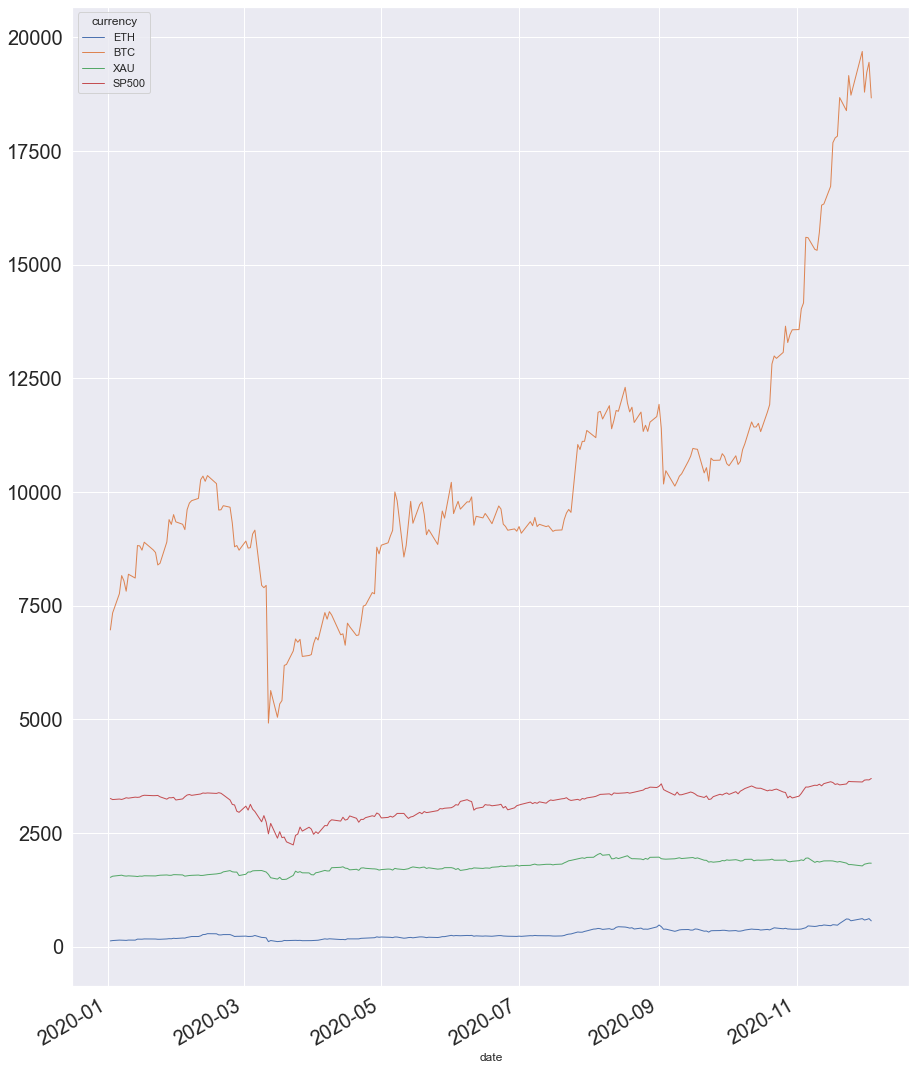

In [35]:
#hide_input
df_covid.plot(figsize=(15,20), linewidth=1, fontsize=20) ;
# plt.savefig('covid-price.eps', format='eps')

### Koreliacija pandemijos metu 

Koreliacijos koeficiento (Spirmano r) matrica.

In [36]:
#hide_input
df_covid.corr()  

currency,ETH,BTC,XAU,SP500
currency,,,,
ETH,1.000000,0.926156,0.771731,0.779035
BTC,0.926156,1.000000,0.585192,0.777893
XAU,0.771731,0.585192,1.000000,0.558416
SP500,0.779035,0.777893,0.558416,1.000000


### Koreliacijos matrica.

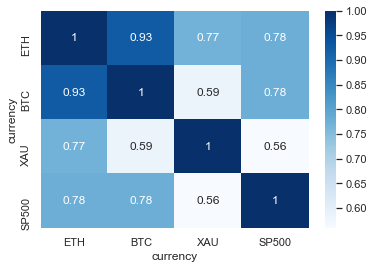

In [37]:
#hide_input
sns.heatmap(df_covid.corr(), annot=True, cmap="Blues") ;
# plt.savefig('covid.eps', format='eps')